# PyTorch Computer Vision

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from helper_functions import accuracy_fn

## Creating Dataset

In [2]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None    
)

# setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None    
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
print(image, label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [5]:
class_names = train_data.classes
print(class_names)

class_to_idx = train_data.class_to_idx
print(class_to_idx)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
print(f'Image shape: {image.shape}')
print(f'Image label: {class_to_idx}')

Image shape: torch.Size([1, 28, 28])
Image label: {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


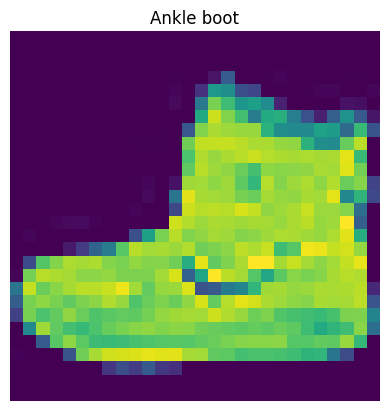

In [8]:
#visualize the image
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)
plt.show()

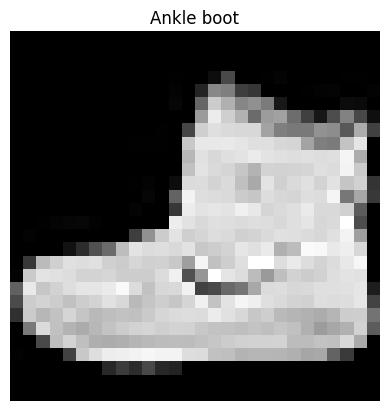

In [9]:
#visualize the image in gray scale
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
plt.show()

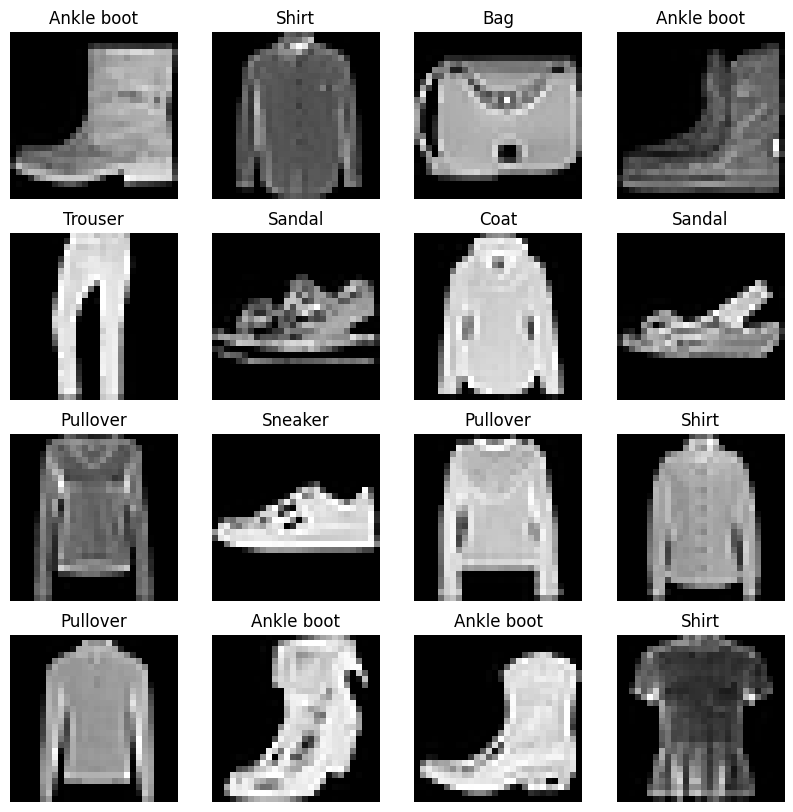

In [10]:
#plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(10, 10))
rows, cols = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)
plt.show()

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [12]:
# setup data loaders
BATCH_SIZE = 32

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x1c042b247a0>,
 <torch.utils.data.dataloader.DataLoader at 0x1c042c18c50>)

In [13]:
print(f'Data loader: {train_loader, test_loader}')
print(f'BATCH_SIZE: {BATCH_SIZE}')
print(f'Lebgth of train loader: {len(train_loader)}')
print(f'Lebgth of test loader: {len(test_loader)}')

Data loader: (<torch.utils.data.dataloader.DataLoader object at 0x000001C042B247A0>, <torch.utils.data.dataloader.DataLoader object at 0x000001C042C18C50>)
BATCH_SIZE: 32
Lebgth of train loader: 1875
Lebgth of test loader: 313


In [14]:
#Check what is inside the data loader
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

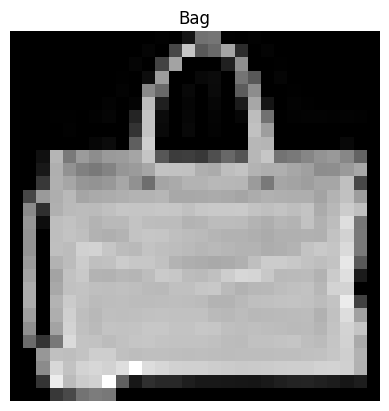

In [15]:
#show a sample
# torch.manual_seed(42)
rand_idx = torch.randint(len(train_features_batch), (1,)).item()
img, label = train_features_batch[rand_idx], train_labels_batch[rand_idx]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label.item()])
plt.axis(False)
plt.show()


# Building Baseline Model

In [16]:
# Create a flatten layer
flatten = nn.Flatten()

#Get a single image from the data loader
X = train_features_batch[0]
print(f'Befor Flatening: {X.shape}')

output = flatten(X)
print(f'After Flatening: {output.shape}')


Befor Flatening: torch.Size([1, 28, 28])
After Flatening: torch.Size([1, 784])


In [17]:
class FashionMNISTModelV0(nn.Module):
    def __init__(
            self,
            input_size: int,
            hidden_size: int,
            output_size: int
                 ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

# Setup the model
model_0 = FashionMNISTModelV0(
    input_size=28*28,
    hidden_size=10,
    output_size=len(class_names)
)

print(model_0)

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)


In [19]:
# Setup loss, optimizer and train the model
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.1)


# Creating a funtion to time our experiment
    Model's Perfomance to find how fast it runs

In [22]:
from timeit import default_timer as timer
def print_train_time(
        start: float,
        end: float,
        device: torch.device = torch.device('cpu')
):
    total_time = end - start
    print(f'Training time: {end - start:.2f} seconds, Device: {device}')

#testing time fns
start = timer()
# Some code
end = timer()
print_train_time(start, end)

Training time: 0.00 seconds, Device: cpu


In [ ]:
# traing loop
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    